In [114]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [115]:
df = pd.read_csv("/Users/timzhi/Desktop/Hedging/Data/copper-prices-historical-chart-data copy.csv")
df.head()


,date,value
0,02/07/1959,0.2930
1,06/07/1959,0.2910
2,07/07/1959,0.2820
3,08/07/1959,0.2846
4,09/07/1959,0.2760


In [116]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15457 entries, 0 to 15456
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    15457 non-null  datetime64[ns]
 1   value   15436 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 241.6 KB


In [117]:
# df.index = pd.to_datetime(df.index)
# month_index = df.index.to_period('M')

In [118]:
df = df.set_index("date")
df.head()

,value
date,
1959-02-07,0.2930
1959-06-07,0.2910
1959-07-07,0.2820
1959-08-07,0.2846
1959-09-07,0.2760


In [119]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.day
df.head()

,value,year,month,weekday
date,,,,
1959-02-07,0.2930,1959,2,7
1959-06-07,0.2910,1959,6,7
1959-07-07,0.2820,1959,7,7
1959-08-07,0.2846,1959,8,7
1959-09-07,0.2760,1959,9,7


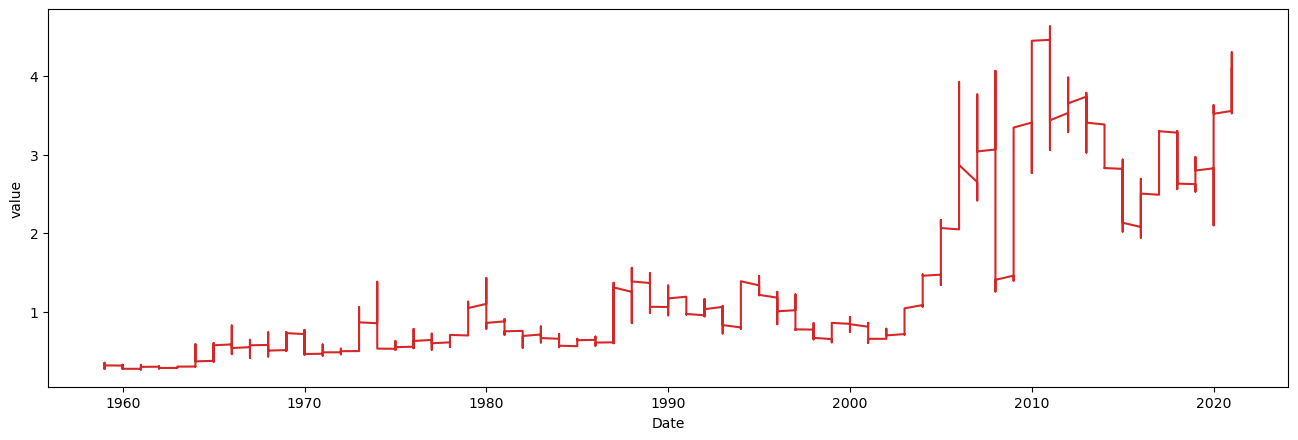

In [130]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.year, y=df.value, title='')    
